# $ Analisis\ exploratorio\ 2019\ -\ Events \ $

In [10]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

events = pd.read_csv('/home/barbara/Documentos/datos/datos2019/data2/events.csv',low_memory = False)

## ahora analizaremos el data frame


In [12]:
events.head(1)


,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17


In [13]:
events.dtypes

date                   object
event_id                int64
ref_type                int64
ref_hash                int64
application_id          int64
attributed               bool
device_countrycode      int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id               object
user_agent            float64
event_uuid             object
carrier               float64
kind                  float64
device_os             float64
wifi                   object
connection_type        object
ip_address              int64
device_language       float64
dtype: object

### Podemos observar que hay muchos de 64 bits, eso lo podemos achicar para que ocupe menos memoria

### Con info podemos observar la memoria que ocupa actualmente

In [2]:
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  object
event_id              int64
ref_type              int64
ref_hash              int64
application_id        int64
attributed            bool
device_countrycode    int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id              object
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             float64
wifi                  object
connection_type       object
ip_address            int64
device_language       float64
dtypes: bool(1), float64(10), int64(6), object(5)
memory usage: 402.0+ MB


### Si haríamos lo que viene a continuacion en este DF, se reduciria el espacio en memoria ocupado, pero se perderían datos

events['event_id'] = events['event_id'].astype(np.int8)
events['ref_type'] = events['ref_type'].astype(np.int8)
events['ref_hash'] = events['ref_hash'].astype(np.int8)
events['application_id'] = events['application_id'].astype(np.int8)
events['device_countrycode'] = events['device_countrycode'].astype(np.int8)
events['device_os_version'] = events['device_os_version'].astype(np.float16)
events['device_brand'] = events['device_brand'].astype(np.float16)
events['device_model'] = events['device_model'].astype(np.float16)
events['device_city'] = events['device_city'].astype(np.float16)
events['session_user_agent'] = events['session_user_agent'].astype(np.float16)
events['user_agent'] = events['user_agent'].astype(np.float16)
events['carrier'] = events['carrier'].astype(np.float16)
events['kind'] = events['kind'].astype(np.float16)
events['device_os'] = events['device_os'].astype(np.float16)
events['ip_address'] = events['ip_address'].astype(np.int8)
events['device_language'] = events['device_language'].astype(np.float16)

## Cantidad de filas del df

In [6]:
len(events)

2494423

In [51]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,carrier,kind,device_os,wifi,connection_type,ip_address,device_language,Year,Weekday,Hour
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019,Tuesday,0
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019,Tuesday,0
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17,2019,Tuesday,0
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17,2019,Tuesday,0
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18,2019,Saturday,21


### Importamos el calendario, y agregamos 3 columnas adicionales para interpretar  mas detalladamente en que momento ocurrio el evento

In [13]:
import calendar 

In [17]:
events['date'] = pd.to_datetime(events['date'])
events['Year'] = events['date'].map(lambda x:x.year)
events['Weekday'] = events['date'].map(lambda x:x.weekday_name)
events['Hour'] = pd.to_datetime(events['date'], format='%H:%M',errors='coerce').dt.hour

/home/barbara/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
categoria = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

events['Weekday'] = events['Weekday'].astype('category', categories=categoria, ordered=True)

/home/barbara/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


## A continuacion se plotea los diferentes eventos en algun tiempo determinado.

Text(0,0.5,'Eventos')

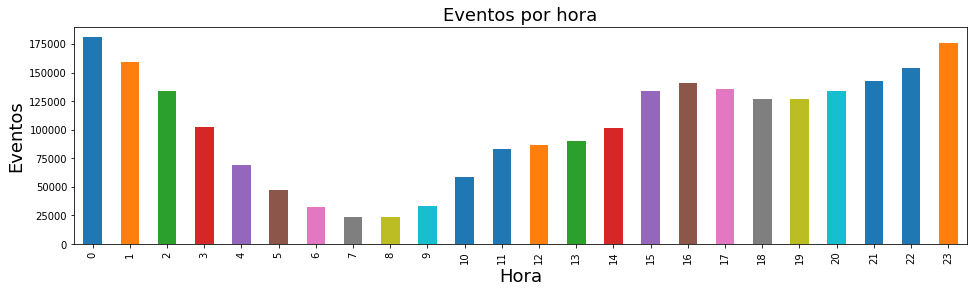

In [38]:
plotHora = events.groupby('Hour').count()['event_id'].plot(kind='bar',figsize=(16,4));

plotHora.set_title("Eventos por hora", fontsize=18)
plotHora.set_xlabel("Hora",fontsize=18)
plotHora.set_ylabel("Eventos", fontsize=18)

Text(0,0.5,'Eventos')

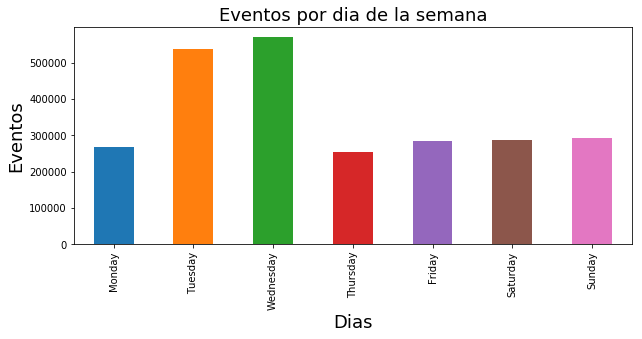

In [45]:
plotSem = events.groupby('Weekday').count()['event_id'].plot(kind='bar',figsize=(10,4));
plotSem.set_title("Eventos por dia de la semana", fontsize=18)
plotSem.set_xlabel("Dias",fontsize=18)
plotSem.set_ylabel("Eventos", fontsize=18)

Text(0,0.5,'Eventos')

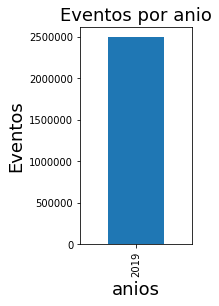

In [49]:
plotAnual = events.groupby('Year').count()['event_id'].plot(kind='bar',figsize=(2,4));

plotAnual.set_title("Eventos por anio", fontsize=18)
plotAnual.set_xlabel("anios",fontsize=18)
plotAnual.set_ylabel("Eventos", fontsize=18)

## Para obtener mas detalle, podemos ver las tablas a continuacion

In [32]:
 events.groupby('Weekday').count()['event_id']

Weekday
Monday       268884
Tuesday      537214
Wednesday    569772
Thursday     253706
Friday       285535
Saturday     286221
Sunday       293091
Name: event_id, dtype: int64

In [33]:
events.groupby('Hour').count()['event_id']

Hour
0     181072
1     159288
2     133891
3     102469
4      69027
5      46961
6      32295
7      23623
8      24076
9      32899
10     58244
11     82888
12     86290
13     89836
14    101452
15    134192
16    140399
17    135168
18    127056
19    126855
20    133759
21    142695
22    154274
23    175714
Name: event_id, dtype: int64

In [34]:
 events.groupby('Year').count()['event_id']

Year
2019    2494423
Name: event_id, dtype: int64

## Ahora analizaremos desde donde vienen los diferentes eventos

#### #La idea sería filtrar las filas que no representan un pais pero en este caso no podemos, ya que los datos son incoherentes con el nombre real del pais


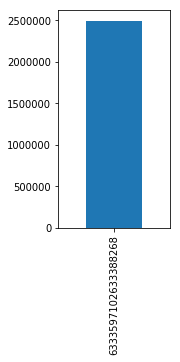

In [56]:
plotDeviceCountryCode=events['device_countrycode'].value_counts()[0:2].plot(kind='bar',figsize=(2,4));



### Al parecer todos los eventos vienen desde un mismo pais

Text(0,0.5,'Eventos')

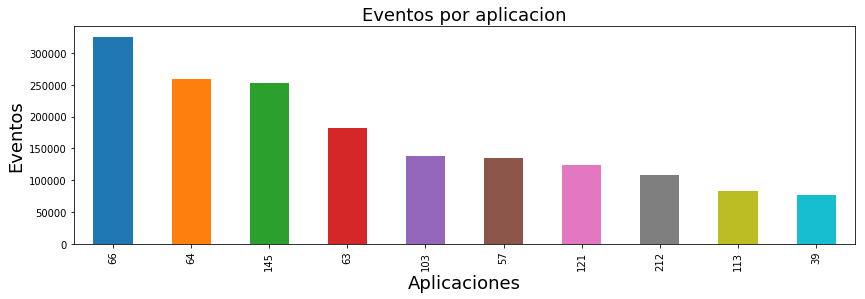

In [62]:
plotAppId=events['application_id'].value_counts()[0:10].plot(kind='bar',figsize=(14,4));
plotAppId.set_title("Eventos por aplicacion", fontsize=18)
plotAppId.set_xlabel("Aplicaciones",fontsize=18)
plotAppId.set_ylabel("Eventos", fontsize=18)

## Aca podemos ver que muchos eventos son generados con la misma IP (No legitimas)

Text(0,0.5,'Eventos')

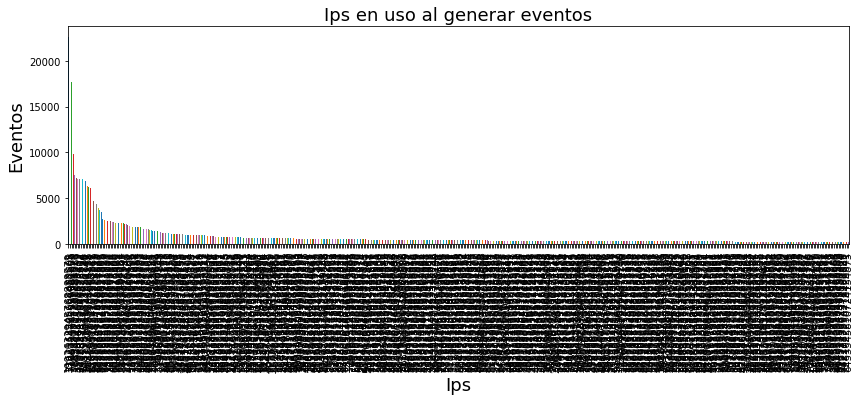

In [67]:
plotIpAddres=events['ip_address'].value_counts()[0:500].plot(kind='bar',figsize=(14,4));
plotIpAddres.set_title("Ips en uso al generar eventos", fontsize=18)
plotIpAddres.set_xlabel("Ips",fontsize=18)
plotIpAddres.set_ylabel("Eventos", fontsize=18)